This dataset includes data for graduate degeres admission collected from Indian applicants, originally found on "Kaggle" (https://www.kaggle.com/mohansacharya/graduate-admissions)

The set includes the following Columns : Serial No., GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research, Chance of Admit

A quick glance at the datasets' columns allows us to conclude the following basic facts and assumptions:
1. Serial number is just for providing a unique index and we can thus drop the column for serial numbers in our analysis. In replace, Panda will generate its own serial numbers for us. 

2. All columns are assumed to share some correlation with the chance of admission. 

In a following section while "Exploring the Data", we will go through each variable individually.

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from matplotlib import colors
from matplotlib.pyplot import pie, axis, show
import seaborn as sns

In [9]:
data = pd.read_csv('C:\\Users\\niyun\\workspace\\Admission_Predict_Ver1.1.csv')

In [31]:
# Let's see what columns we have.
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [32]:
# First, let's rename the variables "LOR " and "Chance of Admit " so that we no longer have the extra space at the end of these two labels.
data.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, axis=1, inplace=True)

In [33]:
# Now, let's get the head of the data.
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
# Let's get the general statistics of the data.
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


From the summary table above, we can see that there are five hundred samples in this data. 
GRE Score: ranges from 290 to 340 
TOEFL Score: ranges from 92 to 120
University Rating: numerical value between 1 to 5, in 1-point increment
SOP: statement of purpose: numerical value between 1 to 5, in 1-point increment
Letters of Recommendation: numerical value between 1 to 5, in 1-point increment
Research: has only two values, 0 or 1. 

In [13]:
# Let's look at the correlation coefficients. 
data.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


From the correlation coefficients table above, we can see that the GRE score and the CGPA share the strongest possitive correlation (0.81 and 0.88, respectively) with the chance of admission. 

The Graduate Record Examinations (GRE) is a standardized test that is an admissions requirement for most graduate schools in the United States. It consists of three parts: Analytial Writing, Verbal, Quantitative. Both the Verbal and the Quantitative sections are scored on a scale of 130 to 170, in one-point increment, and the Writing section is scored on a scale of 1 to 6, in half-point increment. 

Notice that in this data set, the column GRE Score notates the sum of the Verbal and the Quantitative sections, and did not take into consideration the Analytical Writing part. 

According to an official GRE score document, the mean test score for all individuals from July 1,2014 to June 30,2017 (almost 1,700,000 test taker) is 302.85, which rounds to 302,
https://www.ets.org/s/gre/pdf/gre_interpreting_scores.pdf

In [16]:
# We begin by looking at the GRE Score of this sample in more details. Let's first get the general statistics of the GRE Score. 
GRE = pd.DataFrame(data['GRE Score'])
GRE.describe()

,GRE Score
count,500.000000
mean,316.472000
std,11.295148
min,290.000000
25%,308.000000
50%,317.000000
75%,325.000000
max,340.000000


We can see that the sample mean is 316.47, about 5 percent greater than the mean test score provided by the official document.

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

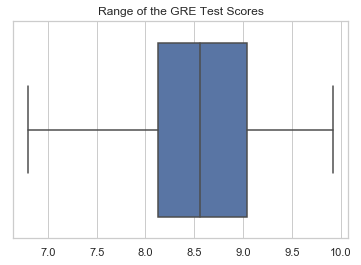

In [46]:
sns.boxplot(GRE).set_title('Range of the GRE Test Scores')
sns.set(style="whitegrid")
dataset = sns.load_dataset("C:\\Users\\niyun\\workspace\\Admission_Predict_Ver1.1.csv")
ax = sns.boxplot(x=dataset["GRE Score"])

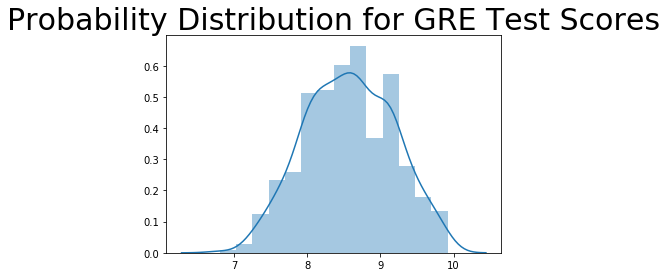

In [41]:
# Visualization
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='30')
plt.show()

In [43]:
# We now move on to look at another highly correlated factor, namely, the applicant's college GPA.
CGPA = pd.DataFrame(data['CGPA'])
CGPA.describe()

,CGPA
count,500.000000
mean,8.576440
std,0.604813
min,6.800000
25%,8.127500
50%,8.560000
75%,9.040000
max,9.920000
